## House price estimation based on several features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# load data
df = pd.read_csv('../data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# check if any feature is null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Feature engineering (extracting usefull feature)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

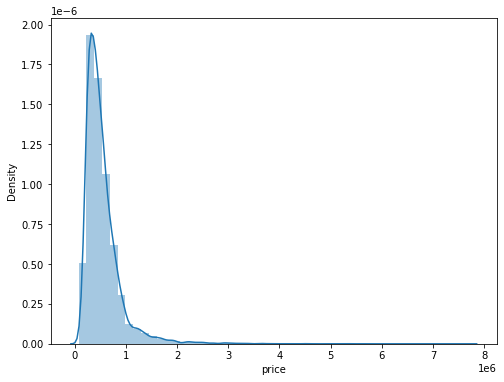

In [5]:
plt.figure(figsize=(8,6))
sns.distplot(df['price'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

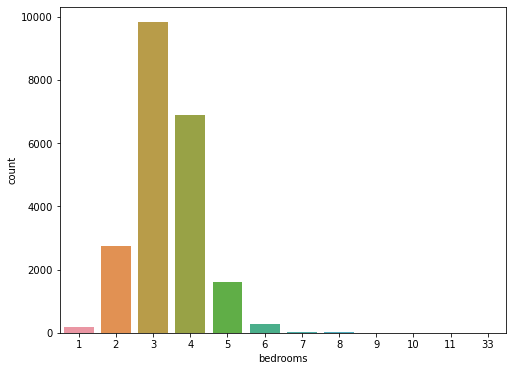

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

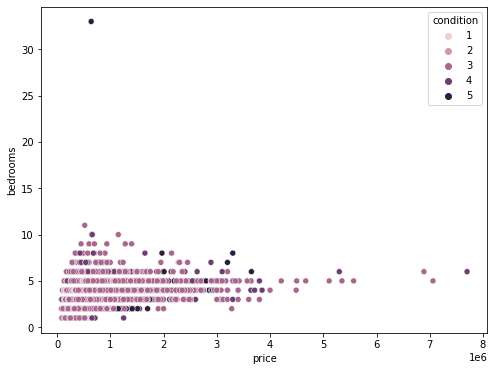

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['price'],y=df['bedrooms'],hue=df['condition'])

<AxesSubplot:xlabel='view', ylabel='price'>

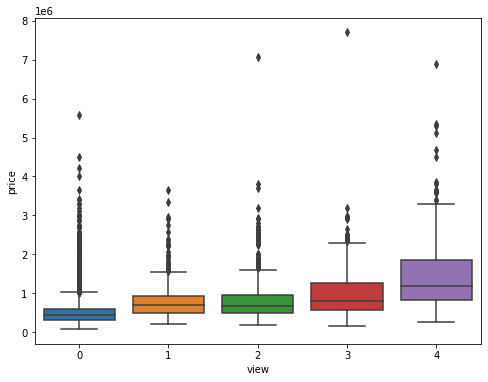

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['view'], y=df['price'])

<AxesSubplot:xlabel='zipcode', ylabel='price'>

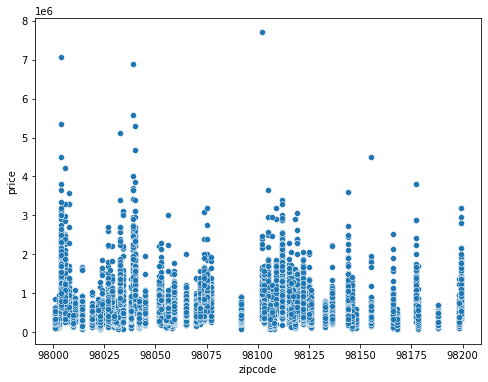

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['zipcode'], y=df['price'])

#### zipcode doesn't seems to have any pattern with price

In [10]:
df = df.drop('zipcode', axis=1)

<AxesSubplot:xlabel='yr_built', ylabel='price'>

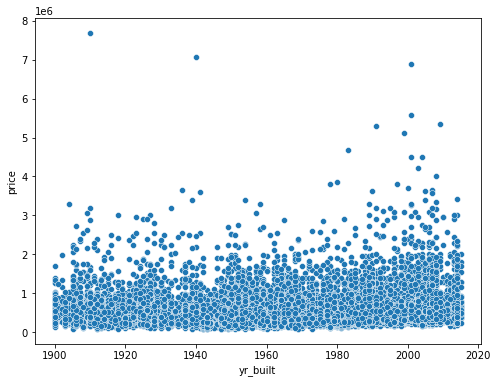

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['yr_built'], y=df['price'])

#### yr_built doesn't seems to have any pattern with price

In [12]:
df = df.drop('yr_built', axis=1)

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

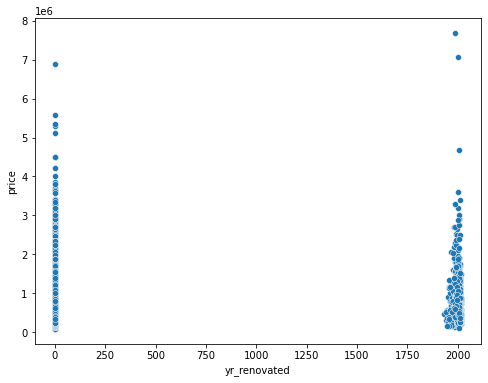

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['yr_renovated'], y=df['price'])

#### yr_renovated doesn't seems to have any pattern with price

In [14]:
df = df.drop('yr_renovated', axis=1)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

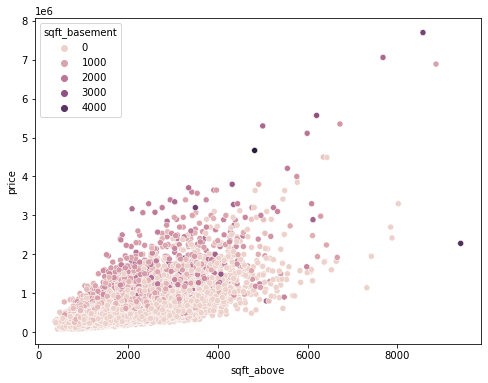

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['sqft_above'], y=df['price'], hue=df['sqft_basement'])

<AxesSubplot:xlabel='grade', ylabel='price'>

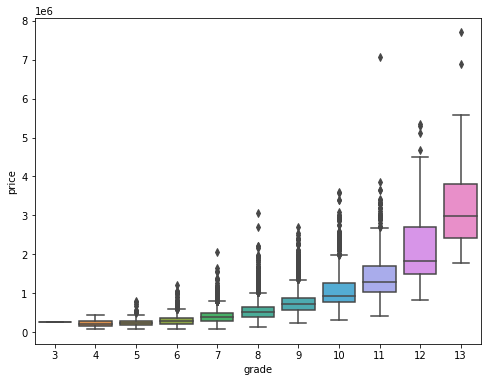

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['grade'], y=df['price'])

<AxesSubplot:xlabel='long', ylabel='lat'>

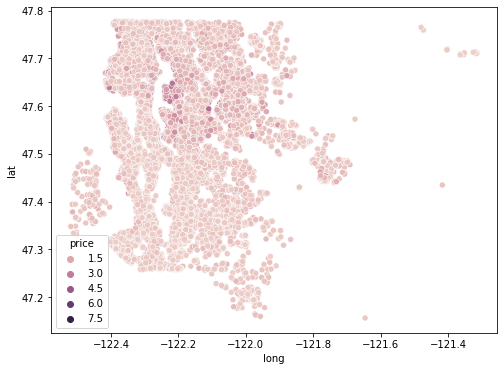

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['long'], y=df['lat'], hue=df['price'])

## Feature engineering with date

In [18]:
# change date style
df['date'] = pd.to_datetime(df['date'])
# df['date']

In [19]:
df['year'] = df['date'].apply(lambda date:date.year)
df['month'] = df['date'].apply(lambda date:date.month)

<AxesSubplot:xlabel='year', ylabel='price'>

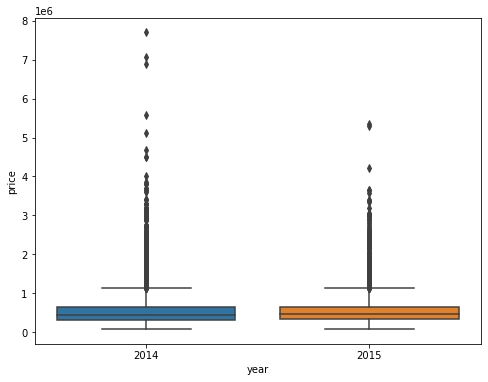

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['year'], y=df['price'])

<AxesSubplot:xlabel='month', ylabel='price'>

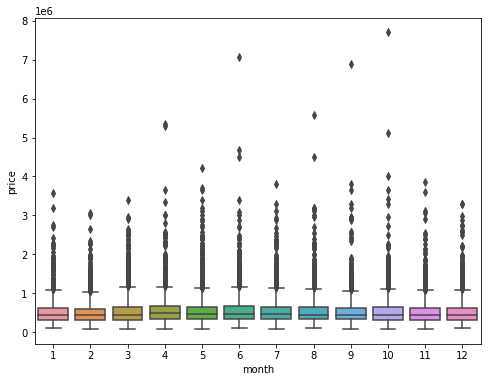

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['month'], y=df['price'])

### Price groupby month

In [22]:
df.groupby('month').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,year
month,,,,,,,,,,,,,,,,,,
1,4.574031e+09,525963.251534,3.387526,2.129346,2085.094070,17869.721881,1.478528,0.008180,0.246421,3.347648,7.642127,1814.019427,271.074642,47.553500,-122.212188,1975.859918,12687.026585,2015.000000
2,4.599148e+09,508520.051323,3.347233,2.062550,2012.901363,13694.825180,1.466319,0.004812,0.242181,3.405774,7.558140,1727.935846,284.965517,47.546850,-122.216140,1944.269447,11595.312751,2015.000000
3,4.600587e+09,544057.683200,3.367467,2.065333,2021.968533,15604.088533,1.464267,0.006933,0.238933,3.355733,7.588267,1740.604800,281.363733,47.553377,-122.214041,1951.490133,12678.426133,2015.000000
4,4.692244e+09,562215.615074,3.367878,2.107896,2060.743831,14273.263795,1.495065,0.008524,0.230597,3.358905,7.651413,1777.883804,282.860027,47.560614,-122.213484,1986.577389,12653.579632,2015.000000
5,4.608945e+09,550849.746893,3.363712,2.116508,2090.514913,16678.293289,1.486123,0.005385,0.239022,3.420464,7.674399,1780.695940,309.818973,47.565075,-122.214854,1990.449876,13694.719553,2014.267606
6,4.573204e+09,557534.318182,3.421488,2.165863,2131.163912,14258.142792,1.512167,0.008724,0.241047,3.460514,7.736915,1820.423324,310.740588,47.565513,-122.214423,2033.827824,12835.893939,2014.000000
7,4.578350e+09,544892.161013,3.391678,2.146540,2128.246495,13857.654907,1.522162,0.006784,0.221167,3.442786,7.716870,1841.531886,286.714609,47.560198,-122.206664,2029.130710,12584.116689,2014.000000
8,4.618561e+09,536655.212481,3.357401,2.123388,2085.100567,14643.078391,1.499484,0.006189,0.223311,3.440433,7.685921,1798.394533,286.706034,47.564750,-122.209769,1995.968025,12966.646209,2014.000000
9,4.462029e+09,529723.517787,3.365330,2.133117,2079.319593,15365.775833,1.491248,0.008470,0.249012,3.431959,7.644833,1786.968379,292.351214,47.560654,-122.213067,1983.068888,11887.396951,2014.000000


<AxesSubplot:xlabel='month'>

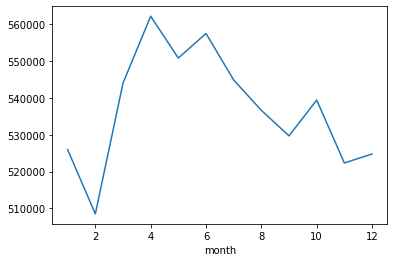

In [23]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

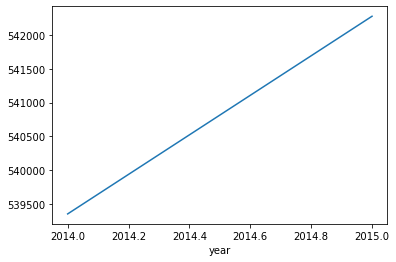

In [24]:
df.groupby('year').mean()['price'].plot()

In [25]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,47.6993,-122.346,1530,1509,2014,5
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,47.5107,-122.362,1830,7200,2015,2
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,47.5944,-122.299,1020,2007,2014,6
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,47.5345,-122.069,1410,1287,2015,1


In [26]:
df = df.drop('id',axis=1)
df = df.drop('date', axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  year           21597 non-null  int64  
 17  month          21597 non-null  int64  
dtypes: flo

### Scaling and test-train split 

In [28]:
X = df.drop('price', axis=1)
y = df['price']

In [29]:
X.shape
y.shape

(21597,)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [32]:
X_train.shape

(15117, 17)

In [33]:
X_test.shape

(6480, 17)

### Normalize/Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

# fit only to the training data to avoid data leakage
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Prepare model

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.optimizers import Adam

In [37]:
model = Sequential()


model.add(Dense(17, activation='relu'))
model.add(Dense(17, activation='relu'))
model.add(Dense(17, activation='relu'))
model.add(Dense(17, activation='relu'))
model.add(Dense(1))

# compile
model.compile(optimizer='Adam', loss='mse')

2023-03-30 12:37:08.864509: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Training 

In [38]:
model.fit(x=X_train,
    y=y_train.values,
    batch_size=128,
    epochs=400,
    validation_data=(X_test,y_test.values))

Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 426826170368.0000 - val_loss: 426950098944.0000
Epoch 2/400
119/119 [==============================] - 0s 933us/step - loss: 426374922240.0000 - val_loss: 425274408960.0000
Epoch 3/400
119/119 [==============================] - 0s 923us/step - loss: 418920300544.0000 - val_loss: 407043211264.0000
Epoch 4/400
119/119 [==============================] - 0s 923us/step - loss: 376242798592.0000 - val_loss: 331116216320.0000
Epoch 5/400
119/119 [==============================] - 0s 980us/step - loss: 261995003904.0000 - val_loss: 187908456448.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 134684868608.0000 - val_loss: 104328921088.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 96661348352.0000 - val_loss: 97112489984.0000
Epoch 8/400
119/119 [==============================] - 0s 990us/step - loss: 93704912896.0000 - val_loss: 95528722432.0000
Epoch 9/40

<AxesSubplot:>

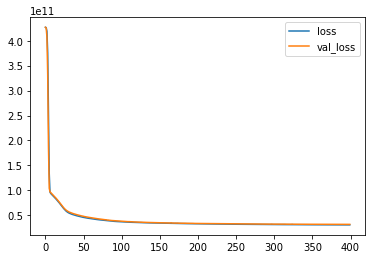

In [39]:
loses = pd.DataFrame(model.history.history)
loses.plot()

### Model Evaluation 

In [40]:
training_score = model.evaluate(X_train,y_train.values)

473/473 [==============================] - 0s 456us/step - loss: 30759647232.0000


In [41]:
test_score = model.evaluate(X_test,y_test.values)

203/203 [==============================] - 0s 469us/step - loss: 31883954176.0000


### Evaluation of test data

In [42]:
pred_y = model.predict(X_test)
pred_y.shape

(6480, 1)

In [43]:
df_pred = pd.Series(pred_y.reshape(6480,))
# df_pred

In [44]:
test_y = pd.Series(y_test.values.reshape(6480,))

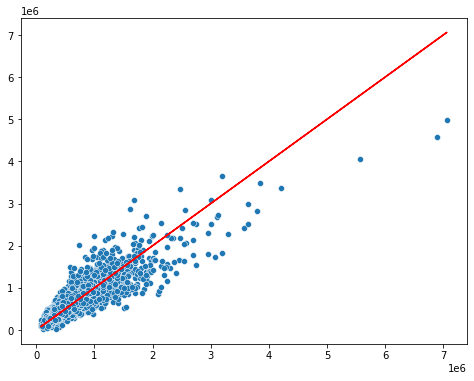

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=test_y, y=df_pred)

# Perfect predictions
plt.plot(test_y,test_y,'r')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

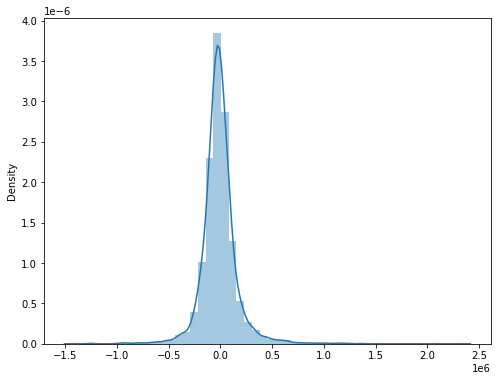

In [46]:
error = test_y - df_pred

plt.figure(figsize=(8,6))
sns.distplot(error)